In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


it is clear that from count value there is no null data.

this can also be checked from below

based on min and max, or based on std it is clear that my dataset has a huge variance

based on the min i have some columns which i have the min as zero and based on this dataset, some columns need not have a zero in them

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

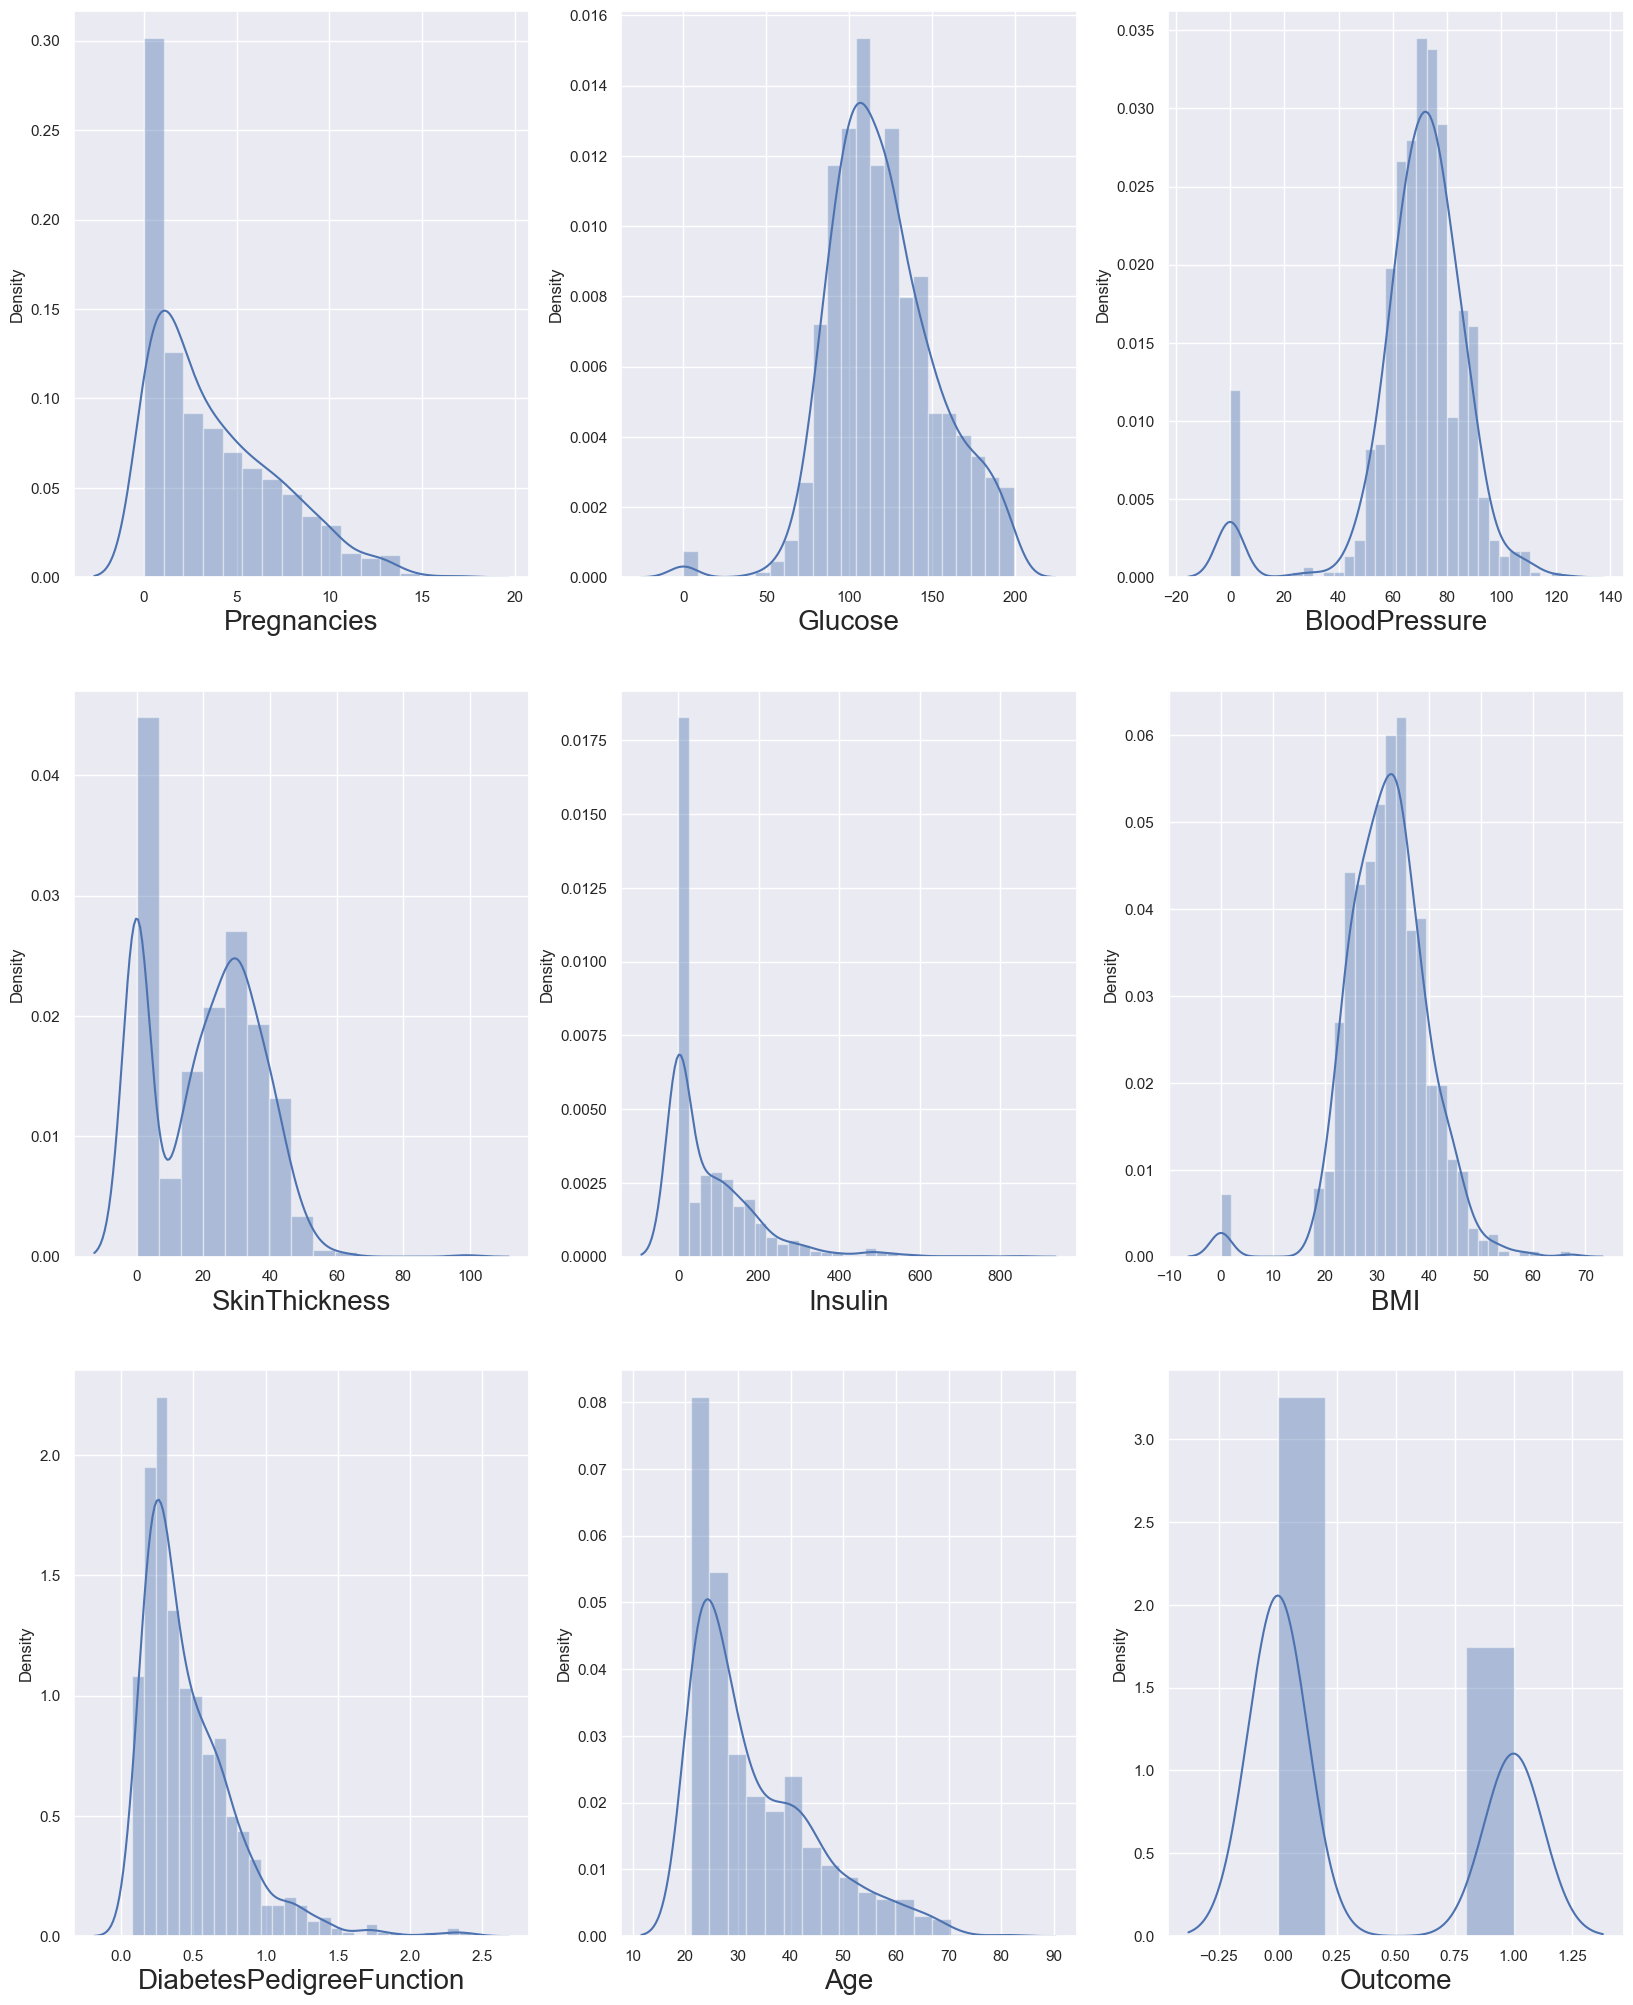

In [6]:
# visualizing the distrubtion of the data, to determine whether my data is normalized or not
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9: #since i have 9 columns in my dataset
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

it is clear that we have skewness in the data in some columns

in my dataset some columns such as SkinThickness, Insulin, BMI, Glucose, BloodPressure have zeros and this is not possible

In [7]:
# replacing the zeros with the mean of the column
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

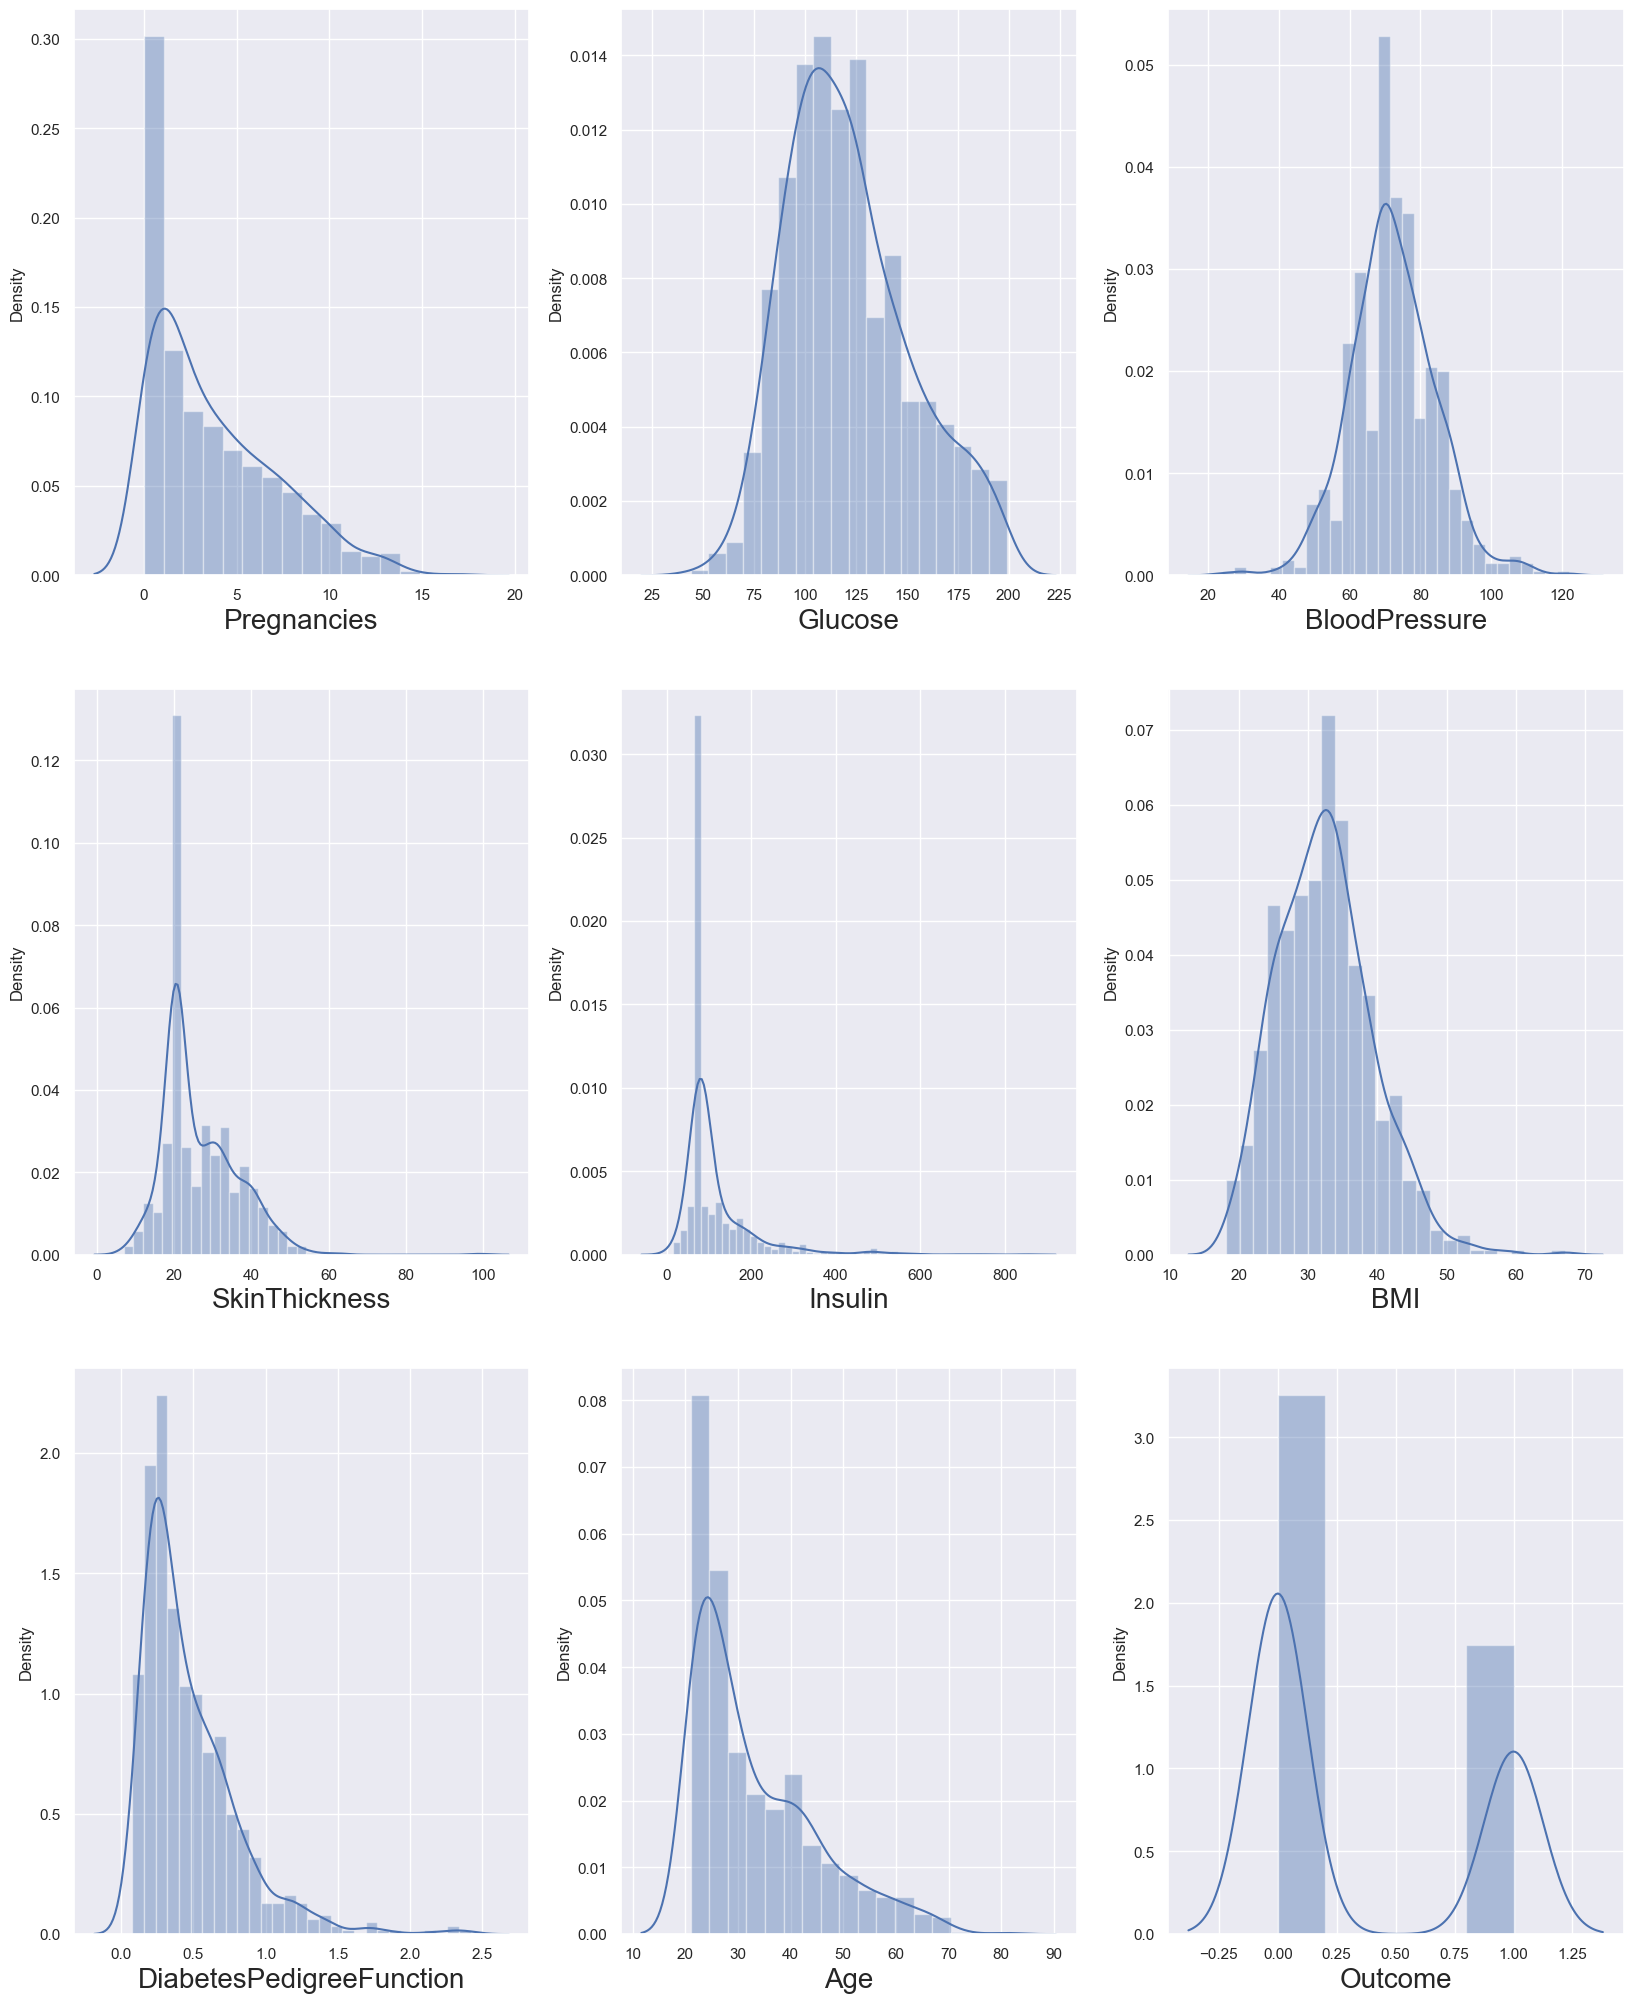

In [8]:
# visualizing the distrubtion of the data, to determine whether my data is normalized or not
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9: #since i have 9 columns in my dataset
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

i have removed the zero's in the crutial columns where data cant be zero

<AxesSubplot:>

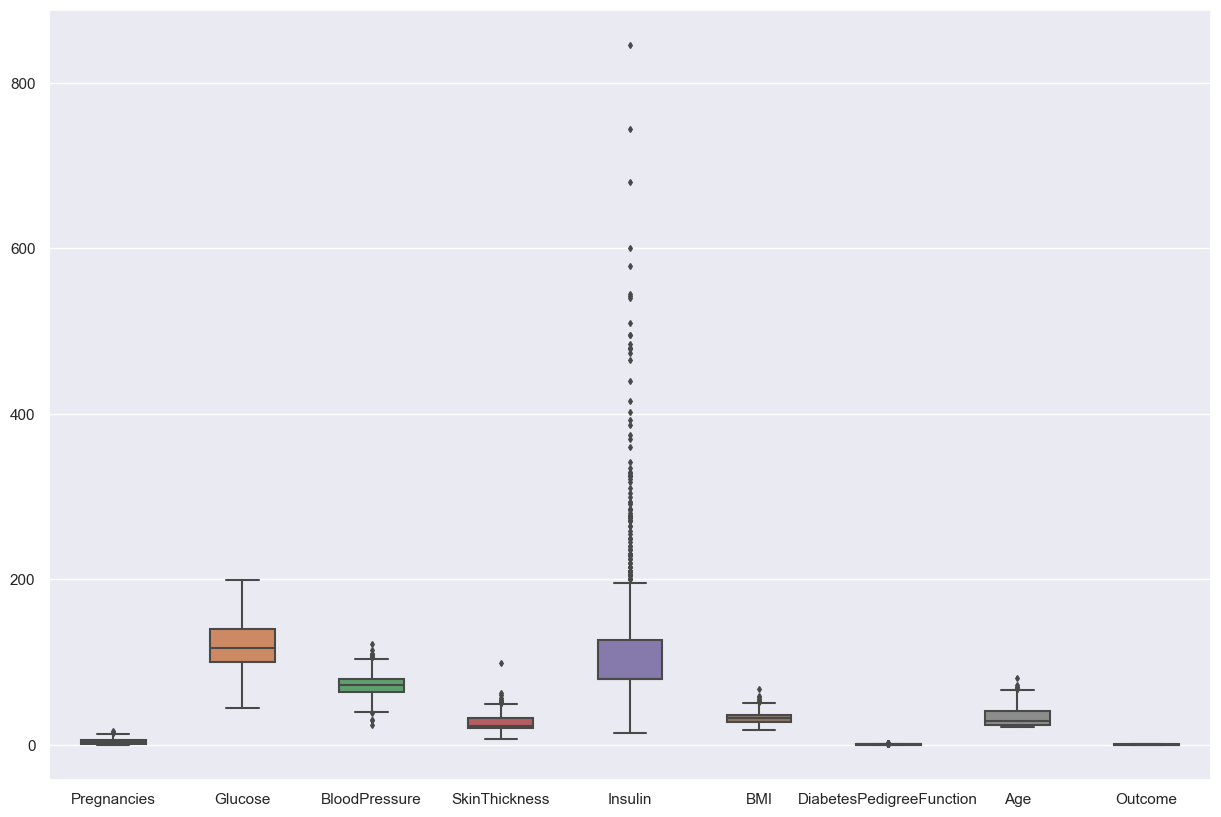

In [9]:
# checking whether my data contains outliers using boxplot
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)


my dataset contains outliers, which need to be removed

In [10]:
q = data['Pregnancies'].quantile(0.98)
# am removing the top 2% data from the pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data['BMI'].quantile(0.99)
# here am removing top 1% from the BMI column
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data['SkinThickness'].quantile(0.99)
# here am removing the top 1% from the SkinThickness column
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data['Insulin'].quantile(0.95)
# here am removing the top 5% from the insulin column
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

q = data['DiabetesPedigreeFunction'].quantile(0.99)
# am removing the top 1% from DiabetesPedigreeFunction
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data['Age'].quantile(0.99)
# here am removing the top 1% from the age column
data_cleaned = data_cleaned[data_cleaned['Age']<q]

In [11]:
data.shape

(768, 9)

In [12]:
data_cleaned.shape

(680, 9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

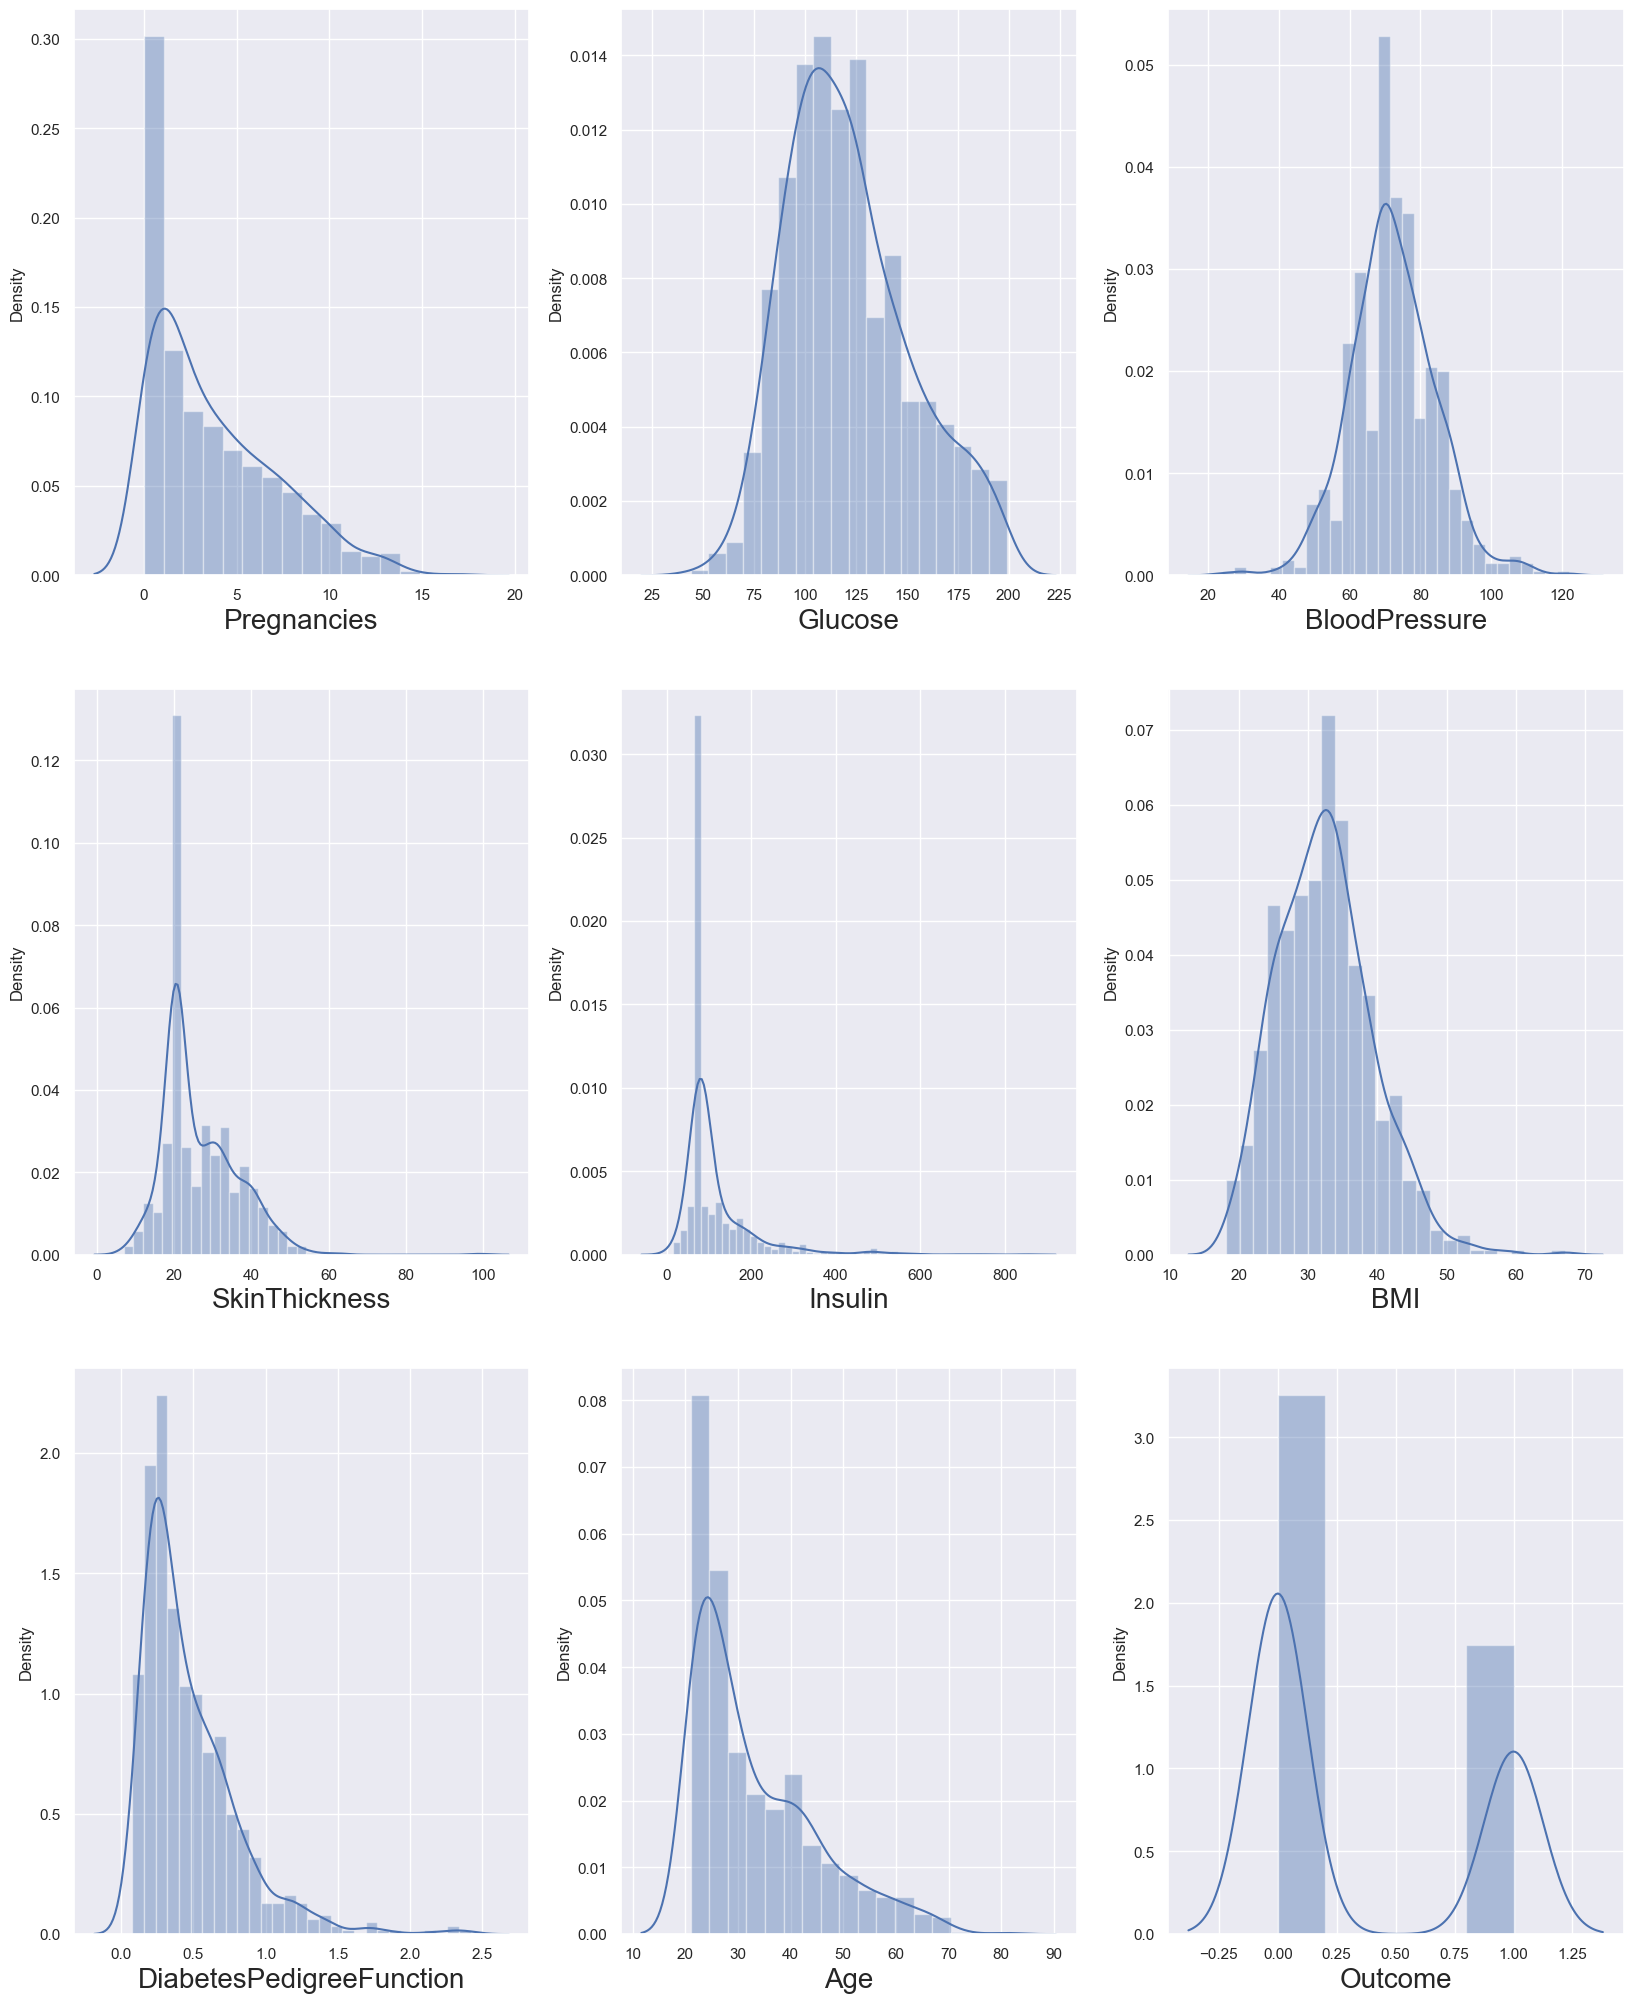

In [13]:
#how the data is distribured for every column after removing the outliers and the zero's in the crutial columns
# visualizing the distrubtion of the data, to determine whether my data is normalized or not
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9: #since i have 9 columns in my dataset
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

In [14]:
# separating the input data and the label
X = data_cleaned.drop("Outcome", axis=1)
y = data_cleaned['Outcome']

In [15]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 680, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

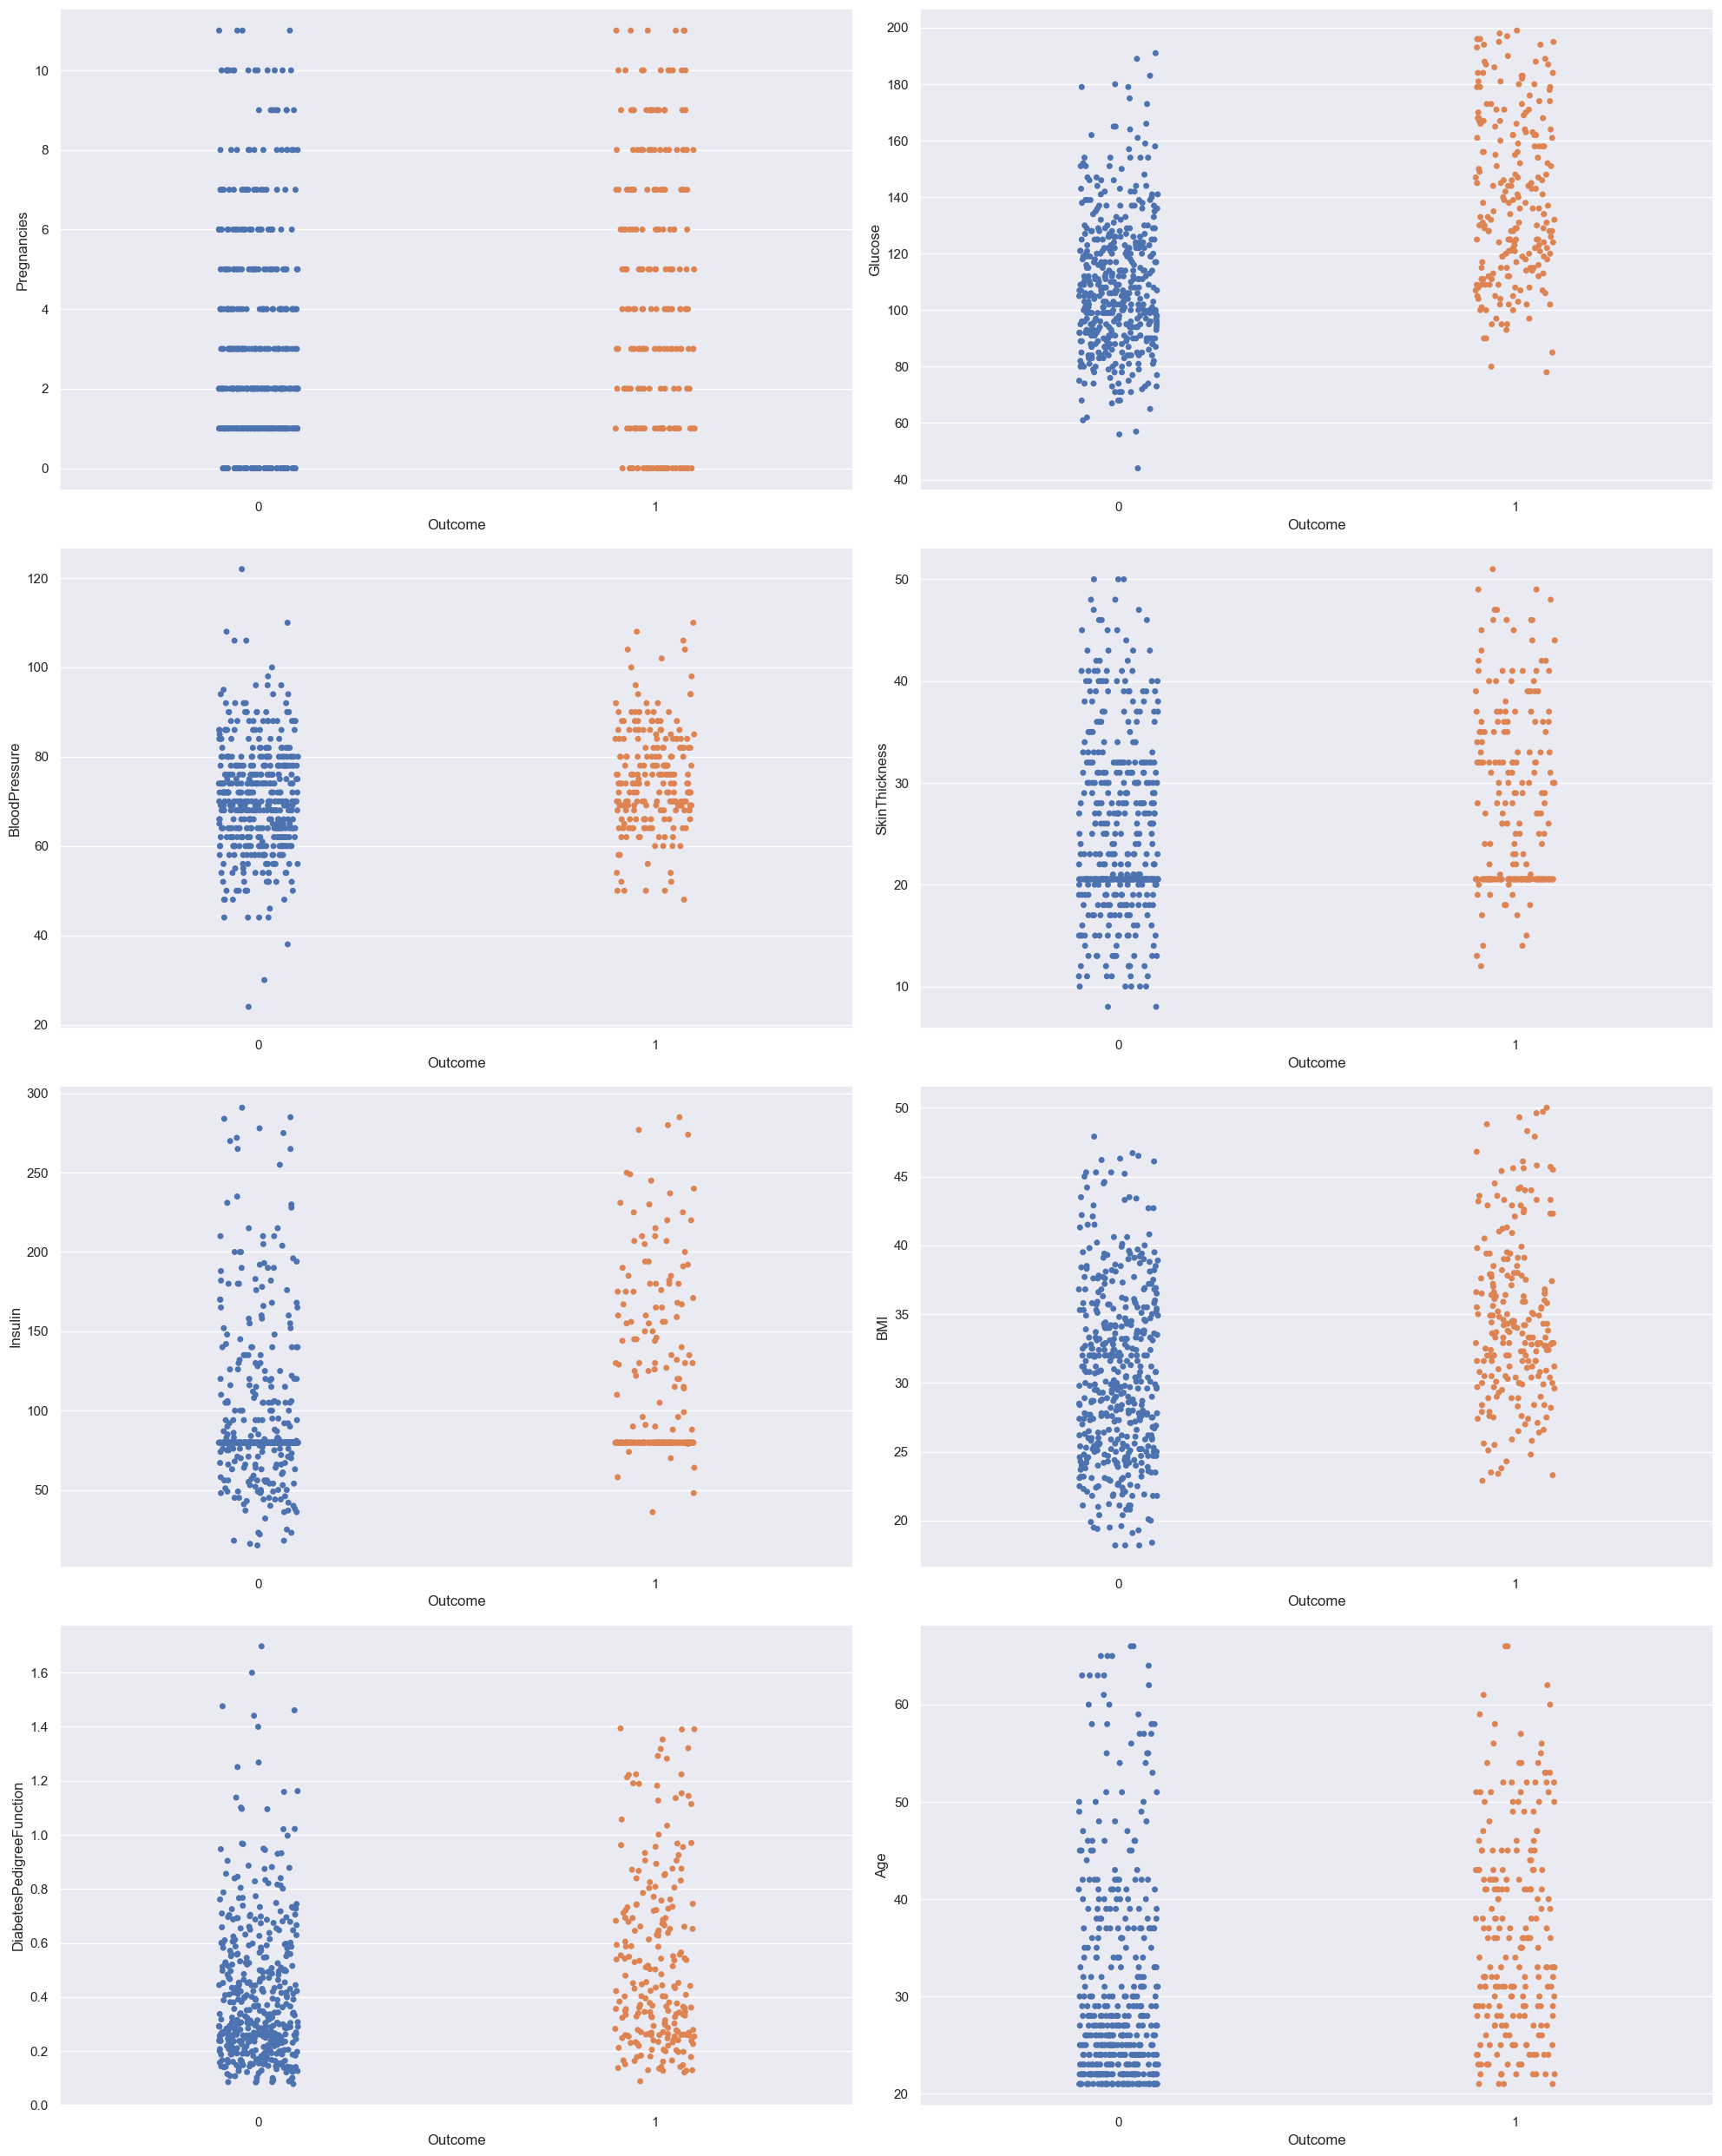

In [16]:
# lets see how data is distributed for every column
plt.figure(figsize=(20, 25))
plotnumber = 1
for column in data:
    if plotnumber <=8:
        ax = plt.subplot(4,2, plotnumber)
        sns.stripplot(y, X[column])
    plotnumber += 1
plt.tight_layout()
        

In [17]:
# lets now scale out data to minimize the huge variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# checking for multicollinearity
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

In [19]:
vif

,vif,Features
0,1.452236,Pregnancies
1,1.306339,Glucose
2,1.263154,BloodPressure
3,1.484098,SkinThickness
4,1.282659,Insulin
5,1.525553,BMI
6,1.040328,DiabetesPedigreeFunction
7,1.666414,Age


In [20]:
# our vif is good since they are below 5 which shows that the multicollinearity is not that severe

In [21]:
# splitting the  dataset into training and the testing dataset
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=355)

In [22]:
# lets fit data into our model and see how well it performs
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
# lets see the score of our model using the test dataset
knn.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7794117647058824

In [24]:
y_pred = knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
y_pred.shape

(204,)

In [26]:
y_test.shape

(204,)

In [27]:
accuracy_score(y_test ,y_pred)

0.7794117647058824

In [28]:
# evauating the accuracy of the training data
knn.score(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8256302521008403

In [29]:
# hyperparameter tuning to incease the accuracy
param_grid = {
    'algorithm' : ['brute', 'kd_tree', 'ball_tree'],
    'leaf_size' : [18,20,25,27,30,32,34],
    'n_neighbors' : [3,5,7,9,10,11,12,13]
}

In [30]:
gridsearch = GridSearchCV(knn, param_grid, verbose=3)

In [31]:
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=brut

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.726 total t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=0.758 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.771 total time=   0.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=12;, score=0.737 total t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.758 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.716 total time=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.726 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.792 total t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.758 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.811 total time=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.726 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.758 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.684 total time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=0.760 total time= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=0.758 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.716 total time=   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=12;, score=0.771 total t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.758 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=7;, score=0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.758 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=13;, score=0.758 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.726 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13;, score=0.758 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=5;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.758 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=9;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_si

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=13;, score=0.758 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12;, score=0.726 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.779 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.705 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.716 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=10;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=10;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=13;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=13;, score=0.758 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.747 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.632 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.737 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.771 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.737 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.726 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=13;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'kd_tree', 'ball_tree'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [32]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 18, 'n_neighbors': 13}

In [33]:
knn = KNeighborsClassifier(algorithm='brute', leaf_size=18, n_neighbors=13)

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=18, n_neighbors=13)

In [35]:
# knn score on the training data
knn.score(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8025210084033614

our accuracy for the training looks like it have decreased, it seems like our model was overfitting on the training data before

In [36]:
# knn score on the test data
knn.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7696078431372549

using KFold to determine how the model is generalizing the dataset,

we randomly select k to be 12 for k fold

In [37]:
kfold = KFold(n_splits=12, shuffle=True, random_state=42)
kfold.get_n_splits(X_scaled)

12

In [38]:
from statistics import mean
knn = KNeighborsClassifier(algorithm='brute', leaf_size=18, n_neighbors=13)
cnt = 0
count = []
train_score = []
test_score = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work well on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # since y is a dataframe,  we can use iloc to retrive data
    knn.fit(X_train, y_train)
    train_score_ = knn.score(X_train, y_train)
    test_score_ = knn.score(X_test, y_test)
    cnt += 1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train score is", train_score_ , "and test score is", test_score_)
print("************************************************")
print("************************************************")
print("average train score is ", mean(train_score))
print("average test score is", mean(test_score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

for k =  1
train score is 0.7929373996789727 and test score is 0.7894736842105263
for k =  2
train score is 0.7993579454253612 and test score is 0.7719298245614035
for k =  3
train score is 0.7993579454253612 and test score is 0.8245614035087719
for k =  4
train score is 0.8025682182985554 and test score is 0.7192982456140351


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

for k =  5
train score is 0.7897271268057785 and test score is 0.8245614035087719
for k =  6
train score is 0.7993579454253612 and test score is 0.7719298245614035
for k =  7
train score is 0.8041733547351525 and test score is 0.631578947368421
for k =  8
train score is 0.7945425361155698 and test score is 0.7894736842105263
for k =  9
train score is 0.8012820512820513 and test score is 0.8035714285714286
for k =  10
train score is 0.7980769230769231 and test score is 0.8214285714285714
for k =  11
train score is 0.8108974358974359 and test score is 0.6071428571428571
for k =  12
train score is 0.7900641025641025 and test score is 0.7142857142857143
************************************************
************************************************
average train score is  0.7985285820608854
average test score is 0.7557696324143692


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

([<matplotlib.axis.YTick at 0x22518df2d60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

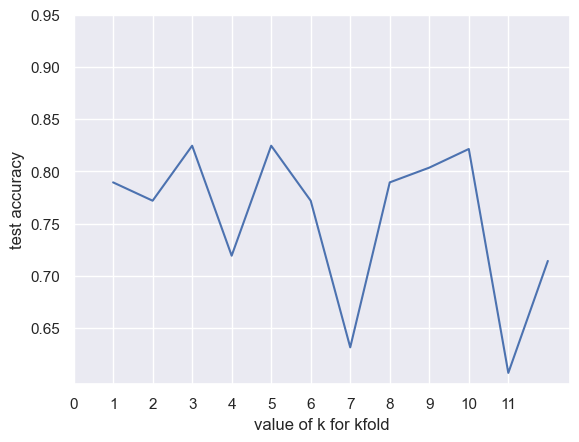

In [39]:
# lets plot the test accuracy with the value of kfold
plt.plot(count, test_score)
plt.xlabel("value of k for kfold")
plt.ylabel("test accuracy")
plt.xticks(np.arange(0,12,1))
plt.yticks(np.arange(0.65, 1, 0.05))

In [40]:
# saving the model
import pickle
with open("finalized_knn_model", "wb") as file:
    pickle.dump(knn, file)
    file.close()
    
with open("scaler_model.pickle", "wb") as file:
    pickle.dump(scaler, file)
    file.close()